In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load the xls/csv dataset, which contains 700+ samples.
data = pd.read_csv('https://raw.githubusercontent.com/AdrianTorjKobza/Python/main/AI_Diagnose_Diabetes_FFNN/diabetes.csv')
data

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,negative
764,2,122,70,27,0,36.8,27,negative
765,5,121,72,23,112,26.2,30,negative
766,1,126,60,0,0,30.1,47,positive


In [3]:
# Extract all the rows and columns (expect the last column which contains the label).
data_samples = data.iloc[:, 0:-1].values
print (data_samples.shape)
print (data_samples)
print ("-------------------------------------------")

data_label = list(data.iloc[:, -1]) # Extract the last column / the label column.
print (data_label)

(768, 7)
[[  6.  148.   72.  ...   0.   33.6  50. ]
 [  1.   85.   66.  ...   0.   26.6  31. ]
 [  8.  183.   64.  ...   0.   23.3  32. ]
 ...
 [  5.  121.   72.  ... 112.   26.2  30. ]
 [  1.  126.   60.  ...   0.   30.1  47. ]
 [  1.   93.   70.  ...   0.   30.4  23. ]]
-------------------------------------------
['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive'

In [4]:
# Convert the data label string ('positive', 'negative') to 1 and 0.
data_label_int = []

for s in data_label:
  if s == 'positive':
    data_label_int.append(1)
  else:
    data_label_int.append(0)

print (data_label_int)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 

In [5]:
# Convert data label int to a numpy array format.
data_label_np = np.array(data_label_int, dtype = 'float64')
print (data_label_np)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [6]:
# Normalize the features (data_samples values) in the range of (-1, 1).
sc = StandardScaler()
data_samples = sc.fit_transform(data_samples)
print (data_samples)

[[ 0.63994726  0.84832379  0.14964075 ... -0.69289057  0.20401277
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.69289057 -0.68442195
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.69289057 -1.10325546
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ...  0.27959377 -0.73518964
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.69289057 -0.24020459
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.69289057 -0.20212881
  -0.87137393]]


In [7]:
# Convert data label numpy array to pytorch tensor format.
data_samples_ts = torch.tensor(data_samples)
print (data_samples_ts.shape)
print (data_samples_ts)
print ("-------------------------------------------")

data_label_ts = torch.tensor(data_label_np)
print (data_label_ts.shape)
print (data_label_ts)

torch.Size([768, 7])
tensor([[ 0.6399,  0.8483,  0.1496,  ..., -0.6929,  0.2040,  1.4260],
        [-0.8449, -1.1234, -0.1605,  ..., -0.6929, -0.6844, -0.1907],
        [ 1.2339,  1.9437, -0.2639,  ..., -0.6929, -1.1033, -0.1056],
        ...,
        [ 0.3430,  0.0033,  0.1496,  ...,  0.2796, -0.7352, -0.2758],
        [-0.8449,  0.1598, -0.4707,  ..., -0.6929, -0.2402,  1.1707],
        [-0.8449, -0.8730,  0.0462,  ..., -0.6929, -0.2021, -0.8714]],
       dtype=torch.float64)
-------------------------------------------
torch.Size([768])
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,

In [8]:
# Transform the 'data_label_ts' into a two-dimensional matrix, so that we can use the binary cross-entropy loss function.
data_label_ts = data_label_ts.unsqueeze(1)
print (data_label_ts.shape)

torch.Size([768, 1])


In [9]:
class Dataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)

In [10]:
dataset = Dataset(data_samples_ts, data_label_ts)
print (len(dataset))

768


In [11]:
# Load the data.
train_loader = DataLoader(dataset = dataset, batch_size = 32, shuffle = True)

In [12]:
# Display the data loader info.
print ("Number of batches in dataset: {}".format(len(train_loader)))

for x, y in train_loader:
  print("For each batch we have:")
  print("Data: {}".format(x.shape))
  print("Labels: {}".format(y.shape))
  break

Number of batches in dataset: 24
For each batch we have:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])


In [13]:
# Create the model, define the input / hidden / output layers and the activation functions.
class Model(nn.Module):
  def __init__(self, input_features, output_features):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_features, 5) # input layer
    self.fc2 = nn.Linear(5, 4) # hidden layer 1
    self.fc3 = nn.Linear(4, 3) # hidden layer 2
    self.fc4 = nn.Linear(3, output_features) # output layer

    self.tanh = nn.Tanh() # tanh activation function
    self.sigmoid = nn.Sigmoid() # sigmoid activation function

  # Feed-forwad the data through each layer and apply the activation functions.
  def forward(self, x):
    out = self.fc1(x)
    out = self.tanh(out)
    
    out = self.fc2(out)
    out = self.tanh(out)

    out = self.fc3(out)
    out = self.tanh(out)

    out = self.fc4(out)
    out = self.sigmoid(out)

    return out

In [ ]:
network = Model(7, 1) # Define the network (object of class Model), with 7 input features and 1 output feature.
criterion = torch.nn.BCELoss(size_average = True) # User the binary cross-entropy loss function.
optimizer = torch.optim.SGD(network.parameters(), lr = 0.1, momentum = 0.9) # Use the SGD optimization algorithm.

In [27]:
# Train the netwwork.
epochs = 1
loss_list = []
accuracy_list = []

for epoch in range(epochs):
  for inputs, labels in train_loader:
    inputs = inputs.float()
    labels = labels.float()

    outputs = network(inputs) # Forward propagation.
    loss = criterion(outputs, labels) # Calculate the loss between prediction and actual labels.
    loss_list.append(loss.detach().numpy().tolist())

    optimizer.zero_grad() # Clear the gradients buffer and set them to zero.
    loss.backward() # Back propagation to calculate the gradients.
    optimizer.step() # Update the weights.

    output = (outputs > 0.5).float() # Set output to 1 if > 0.5 and to 0 if <= 0.5
    accuracy = (output == labels) # Set accuracy to 1 if output = label, otherwise set it to 0.
    accuracy = accuracy.float().mean() # Calculate the mean.
    accuracy_list.append(accuracy.detach().numpy().tolist())

    print ("Epoch: {} | Loss: {:.3f} | Accuracy: {:.3f}".format(epoch + 1, loss, accuracy))

Epoch: 1 | Loss: 0.432 | Accuracy: 0.812
Epoch: 1 | Loss: 0.350 | Accuracy: 0.844
Epoch: 1 | Loss: 0.709 | Accuracy: 0.594
Epoch: 1 | Loss: 0.452 | Accuracy: 0.812
Epoch: 1 | Loss: 0.485 | Accuracy: 0.719
Epoch: 1 | Loss: 0.383 | Accuracy: 0.844
Epoch: 1 | Loss: 0.562 | Accuracy: 0.750
Epoch: 1 | Loss: 0.607 | Accuracy: 0.625
Epoch: 1 | Loss: 0.374 | Accuracy: 0.906
Epoch: 1 | Loss: 0.425 | Accuracy: 0.781
Epoch: 1 | Loss: 0.488 | Accuracy: 0.750
Epoch: 1 | Loss: 0.387 | Accuracy: 0.844
Epoch: 1 | Loss: 0.463 | Accuracy: 0.781
Epoch: 1 | Loss: 0.468 | Accuracy: 0.688
Epoch: 1 | Loss: 0.404 | Accuracy: 0.844
Epoch: 1 | Loss: 0.654 | Accuracy: 0.719
Epoch: 1 | Loss: 0.481 | Accuracy: 0.719
Epoch: 1 | Loss: 0.441 | Accuracy: 0.844
Epoch: 1 | Loss: 0.422 | Accuracy: 0.719
Epoch: 1 | Loss: 0.458 | Accuracy: 0.750
Epoch: 1 | Loss: 0.513 | Accuracy: 0.812
Epoch: 1 | Loss: 0.361 | Accuracy: 0.875
Epoch: 1 | Loss: 0.509 | Accuracy: 0.719
Epoch: 1 | Loss: 0.377 | Accuracy: 0.875


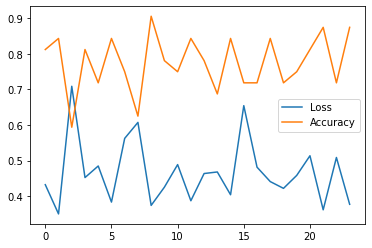

In [28]:
plt.plot(loss_list, label = 'Loss')
plt.plot(accuracy_list, label = 'Accuracy')
plt.legend()